# DengAI - Rohit 

## Pre-Processing

In [38]:
# import libraries to be used...
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import xgboost as xgb
from xgboost import XGBRegressor 
from sklearn.grid_search import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [40]:
# read files 
tr = pd.read_csv("dengue_features_train.csv")
tr["total_cases"] = pd.read_csv("dengue_labels_train.csv")["total_cases"]
tr["Type"] = "train"

tst = pd.read_csv("dengue_features_test.csv")
tst["total_cases"] = np.nan
tst["Type"] = "test"

In [42]:
# find out the shape of the various csv files 
print(tr.shape)
print(tst.shape)

(1456, 26)
(416, 26)


In [44]:
# look at data of the head for San Juan
df = [train,test]
data = pd.concat(df,ignore_index = True)
print(data.shape)
data.head()

(1872, 26)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,Type
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4.0,train
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5.0,train
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4.0,train
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3.0,train
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6.0,train


## Features and their descriptions
copied from the example website

<b><i>City and date indicators</i></b><br/>
<b>city</b> – City abbreviations: sj for San Juan and iq for Iquitos<br/>
<b>week_start_date</b> – Date given in yyyy-mm-dd format<p/>
<b><i>NOAA's GHCN daily climate data weather station measurements</i></b><br/>
<b>station_max_temp_c</b> – Maximum temperature<br/>
<b>station_min_temp_c</b> – Minimum temperature<br/>
<b>station_avg_temp_c</b> – Average temperature<br/>
<b>station_precip_mm</b> – Total precipitation<br/>
<b>station_diur_temp_rng_c</b> – Diurnal temperature range<p/>
<b><i>PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)</i></b><br/>
<b>precipitation_amt_mm</b> – Total precipitation<p/>
<b><i>NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)</i></b><br/>
<b>reanalysis_sat_precip_amt_mm</b> – Total precipitation<br/>
<b>reanalysis_dew_point_temp_k</b> – Mean dew point temperature<br/>
<b>reanalysis_air_temp_k</b> – Mean air temperature<br/>
<b>reanalysis_relative_humidity_percent</b> – Mean relative humidity<br/>
<b>reanalysis_specific_humidity_g_per_kg</b> – Mean specific humidity<br/>
<b>reanalysis_precip_amt_kg_per_m2</b> – Total precipitation<br/>
<b>reanalysis_max_air_temp_k</b> – Maximum air temperature<br/>
<b>reanalysis_min_air_temp_k</b> – Minimum air temperature<br/>
<b>reanalysis_avg_temp_k</b> – Average air temperature<br/>
<b>reanalysis_tdtr_k</b> – Diurnal temperature range<p/>
<b><i>Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements</i></b><br/>
<b>ndvi_se</b> – Pixel southeast of city centroid<br/>
<b>ndvi_sw</b> – Pixel southwest of city centroid<br/>
<b>ndvi_ne</b> – Pixel northeast of city centroid<br/>
<b>ndvi_nw</b> – Pixel northwest of city centroid<br/>


In [47]:
#identifies possible duplicates - there are none
np.sum(data.duplicated())

0

In [48]:
#detects missing values
data.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  237
ndvi_nw                                   63
ndvi_se                                   23
ndvi_sw                                   23
precipitation_amt_mm                      15
reanalysis_air_temp_k                     12
reanalysis_avg_temp_k                     12
reanalysis_dew_point_temp_k               12
reanalysis_max_air_temp_k                 12
reanalysis_min_air_temp_k                 12
reanalysis_precip_amt_kg_per_m2           12
reanalysis_relative_humidity_percent      12
reanalysis_sat_precip_amt_mm              15
reanalysis_specific_humidity_g_per_kg     12
reanalysis_tdtr_k                         12
station_avg_temp_c                        55
station_diur_temp_rng_c                   55
station_max_temp_c                        23
station_mi

In [49]:
print(data.shape)
print(data.dropna().shape)

(1872, 26)
(1199, 26)


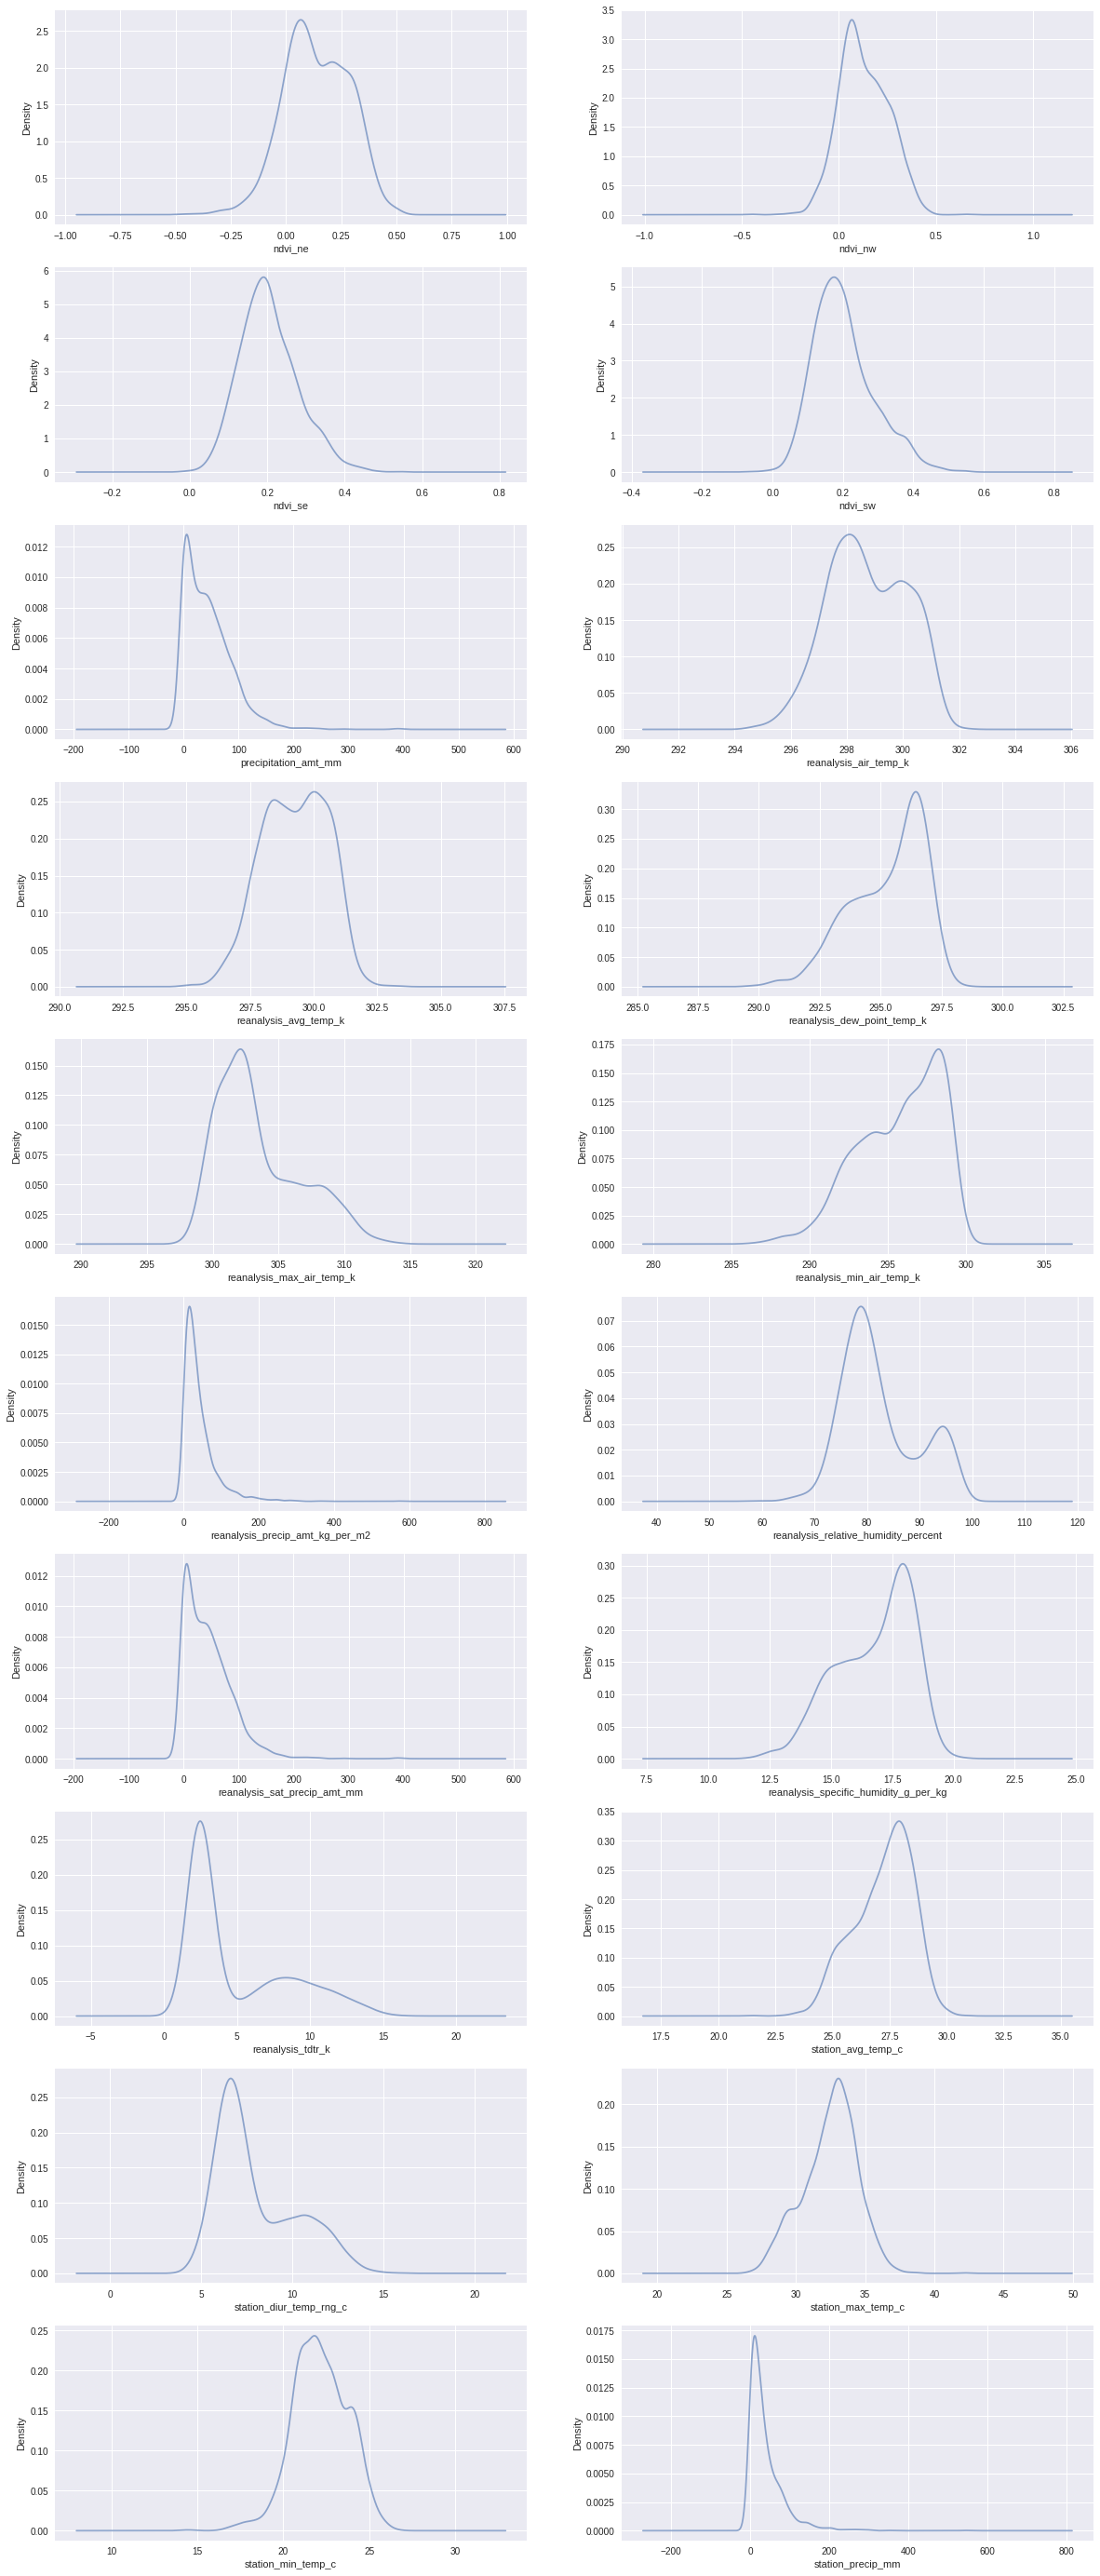

In [50]:
plt.rc("font", size=13)
plt.figure(figsize=(20,50))
alpha=0.6

#--------------------------------------------------#

ax1 = plt.subplot2grid((10,2), (0,0))
data.ndvi_ne.plot(kind="kde",alpha=alpha)
ax1.set_xlabel("ndvi_ne")

ax2 = plt.subplot2grid((10,2),(0,1))
data.ndvi_nw.plot(kind="kde",alpha=alpha)
ax2.set_xlabel("ndvi_nw")


ax3 = plt.subplot2grid((10,2),(1,0))
data.ndvi_se.plot(kind="kde",alpha=alpha)
ax3.set_xlabel("ndvi_se")

ax4 = plt.subplot2grid((10,2),(1,1))
data.ndvi_sw.plot(kind="kde",alpha=alpha)
ax4.set_xlabel("ndvi_sw")


ax5 = plt.subplot2grid((10,2),(2,0))
data.precipitation_amt_mm.plot(kind="kde",alpha=alpha)
ax5.set_xlabel("precipitation_amt_mm")

ax6 = plt.subplot2grid((10,2),(2,1))
data.reanalysis_air_temp_k.plot(kind="kde",alpha=alpha)
ax6.set_xlabel("reanalysis_air_temp_k")


ax7 = plt.subplot2grid((10,2),(3,0))
data.reanalysis_avg_temp_k.plot(kind="kde",alpha=alpha)
ax7.set_xlabel("reanalysis_avg_temp_k")

ax8 = plt.subplot2grid((10,2),(3,1))
data.reanalysis_dew_point_temp_k.plot(kind="kde",alpha=alpha)
ax8.set_xlabel("reanalysis_dew_point_temp_k")


ax9 = plt.subplot2grid((10,2),(4,0))
data.reanalysis_max_air_temp_k.plot(kind="kde",alpha=alpha)
ax9.set_xlabel("reanalysis_max_air_temp_k")

ax10 = plt.subplot2grid((10,2),(4,1))
data.reanalysis_min_air_temp_k.plot(kind="kde",alpha=alpha)
ax10.set_xlabel("reanalysis_min_air_temp_k")


ax11 = plt.subplot2grid((10,2),(5,0))
data.reanalysis_precip_amt_kg_per_m2.plot(kind="kde",alpha=alpha)
ax11.set_xlabel("reanalysis_precip_amt_kg_per_m2")

ax12 = plt.subplot2grid((10,2),(5,1))
data.reanalysis_relative_humidity_percent.plot(kind="kde",alpha=alpha)
ax12.set_xlabel("reanalysis_relative_humidity_percent")


ax13 = plt.subplot2grid((10,2),(6,0))
data.reanalysis_sat_precip_amt_mm.plot(kind="kde",alpha=alpha)
ax13.set_xlabel("reanalysis_sat_precip_amt_mm")

ax14 = plt.subplot2grid((10,2),(6,1))
data.reanalysis_specific_humidity_g_per_kg.plot(kind="kde",alpha=alpha)
ax14.set_xlabel("reanalysis_specific_humidity_g_per_kg")


ax15 = plt.subplot2grid((10,2),(7,0))
data.reanalysis_tdtr_k.plot(kind="kde",alpha=alpha)
ax15.set_xlabel("reanalysis_tdtr_k")

ax16 = plt.subplot2grid((10,2),(7,1))
data.station_avg_temp_c.plot(kind="kde",alpha=alpha)
ax16.set_xlabel("station_avg_temp_c")


ax17 = plt.subplot2grid((10,2),(8,0))
data.station_diur_temp_rng_c.plot(kind="kde",alpha=alpha)
ax17.set_xlabel("station_diur_temp_rng_c")

ax18 = plt.subplot2grid((10,2),(8,1))
data.station_max_temp_c.plot(kind="kde",alpha=alpha)
ax18.set_xlabel("station_max_temp_c")


ax19 = plt.subplot2grid((10,2),(9,0))
data.station_min_temp_c.plot(kind="kde",alpha=alpha)
ax19.set_xlabel("station_min_temp_c")

ax20 = plt.subplot2grid((10,2),(9,1))
data.station_precip_mm.plot(kind="kde",alpha=alpha)
ax20.set_xlabel("station_precip_mm")

#--------------------------------------------------#    

In [52]:
for col in data.columns:
    if col in ['ndvi_ne','precipitation_amt_mm','reanalysis_air_temp_k','reanalysis_dew_point_temp_k',
                  'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k','reanalysis_relative_humidity_percent',
                  'reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k',
                  'station_avg_temp_c','station_diur_temp_rng_c','station_min_temp_c']:
        data[col].fillna(data[col].median(),inplace=True)
    elif column in ['ndvi_nw','ndvi_se','ndvi_sw','reanalysis_avg_temp_k','reanalysis_precip_amt_kg_per_m2',
                    'station_max_temp_c','station_precip_mm']:
        data[col].fillna(data[col].mean(),inplace=True)        

In [53]:
data.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                    0
ndvi_nw                                    0
ndvi_se                                    0
ndvi_sw                                    0
precipitation_amt_mm                       0
reanalysis_air_temp_k                      0
reanalysis_avg_temp_k                      0
reanalysis_dew_point_temp_k                0
reanalysis_max_air_temp_k                  0
reanalysis_min_air_temp_k                  0
reanalysis_precip_amt_kg_per_m2            0
reanalysis_relative_humidity_percent       0
reanalysis_sat_precip_amt_mm               0
reanalysis_specific_humidity_g_per_kg      0
reanalysis_tdtr_k                          0
station_avg_temp_c                         0
station_diur_temp_rng_c                    0
station_max_temp_c                         0
station_mi

### defines various features 

In [10]:
XCols = ['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm','Type']
YCols = 'total_cases'

## Splitting into Test and Train Subsets

In [54]:
from sklearn.model_selection import train_test_split
#loc is label-based
XX = data.loc[data["Type"]=="train",XCols]
yy = data.loc[data["Type"]=="train",YCols]
XX = XX.drop(['city','year','weekofyear','week_start_date','Type'],axis=1)
print(XX.shape)
print(yy.shape)
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.3, random_state=5)

(1456, 20)
(1456,)


## Multiple Linear Regression

In [55]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True,normalize=True)
reg.fit(XX,yy)
print(reg.intercept_)
reg.coef_

1859.11999875


array([  9.53785541e-01,   3.65849224e+01,  -7.15759119e+00,
         9.59079525e+00,  -1.22880207e-02,   8.72381706e+00,
        -1.34017334e+01,  -3.43640030e+00,   9.59164557e-01,
         5.92148149e-01,   2.85653505e-02,  -1.74792860e+00,
        -1.22880207e-02,   1.18536631e+01,  -2.03155631e+00,
        -2.86442548e-01,  -1.96019418e+00,   2.89399219e+00,
        -1.23253963e-01,   6.39447178e-03])

In [56]:
print(len(reg.coef_))

20


In [57]:
yy_predicted = reg.predict(XX)

In [58]:
from sklearn import metrics

from sklearn.metrics import r2_score
metrics.mean_squared_error(y_true=yy, y_pred=yy_predicted)


1649.147804390979

In [59]:
r2_score(yy, yy_predicted)

0.13171025559203187

In [60]:
test_X = data.loc[data["Type"]=="test",XCols]

In [61]:
test_X = test_X.drop(['city','year','weekofyear','week_start_date','Type'],axis=1)

In [62]:
Cases_Prediction = test_X
Cases_Prediction.head()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1456,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1457,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
1458,-0.001500,0.129713,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
1459,0.127317,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
1460,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [63]:
Prediction = reg.predict(Cases_Prediction)
len(Prediction)
Prediction

array([  2.98336183e+01,   2.54438663e+01,   3.54689152e+01,
         3.47863682e+01,   4.00460774e+01,   3.77426832e+01,
         3.41597899e+01,   4.38051371e+01,   4.43315753e+01,
         4.46030527e+01,   3.62658026e+01,   4.35295215e+01,
         5.73476018e+01,   4.07423667e+01,   4.45743509e+01,
         5.21021465e+01,   5.39164721e+01,   5.02408466e+01,
         5.22679750e+01,   7.17294081e+01,   4.86215566e+01,
         4.63633861e+01,   4.90255932e+01,   4.47061226e+01,
         4.61889672e+01,   3.82432886e+01,   3.83129410e+01,
         3.78860511e+01,   3.56127813e+01,   3.66746657e+01,
         3.47493821e+01,   2.68724891e+01,   2.72186818e+01,
         2.96652664e+01,   1.80894963e+01,   3.70272928e+01,
         1.61454911e+01,   2.04934002e+01,   2.46921483e+01,
         2.28683695e+01,   2.05669673e+01,   2.44044239e+01,
         2.46808550e+01,   2.73042223e+01,   1.46031238e+01,
         2.64481666e+01,   1.51111744e+01,   1.34512725e+01,
         2.04025462e+01,

In [64]:
#gbm = xgb.XGBClassifier(max_depth=3, n_estimators=320, learning_rate=0.49).fit(X_train, y_train)
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
#from sklearn.model_selection import GridSearchCV
#gbm = xgb.XGBClassifier(max_depth=3, n_estimators=320, learning_rate=0.49).fit(X_train, y_train)
#Prediction = gbm.predict(X_test)
#param = {'max_depth':(1,2,3,4,5,6,7,8,9,10,11,12,13,25), 'learning_rate':[0.003,0.03,0.3,0.5,0.005,0.001,0.01,0.05,0.7,1,0.09,0.0001]}
#model = XGBRegressor(n_estimators=700)
#thepick = GridSearchCV(model, param)
#thepick.fit(X_train, y_train)
# make predictions for test data
#y_pred = thepick.predict(X_test)
#if y_pred.all() < 0:
 #   y_pred = 0
#Prediction = [round(value) for value in y_pred]
meana = mean_absolute_error(y_true=yy, y_pred=yy_predicted)
print("MeanAbsErr: ", meana )


MeanAbsErr:  20.718520773


## submission yields a MAE of 26.606

In [67]:
# Columns to use in final output file
Data_Predicted = pd.read_csv("dengue_features_test.csv",usecols=["city","year","weekofyear"])

In [68]:
Data_Predicted['total_cases'] = round(pd.Series(Prediction))
Data_Predicted.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,30.0
1,sj,2008,19,25.0
2,sj,2008,20,35.0
3,sj,2008,21,35.0
4,sj,2008,22,40.0


In [71]:
#changes any floats to ints
Data_Predicted['total_cases'] = Data_Predicted['total_cases'].astype('int64')

In [72]:
#may be useless but seems to work
for idx in range(Data_Predicted.shape[0]):
    if Data_Predicted.total_cases[idx]<0:
        Data_Predicted.total_cases[idx] = 0

### Submission and read output to file

In [73]:
Data_Predicted.to_csv('Final_Output.csv',index=False)